In [1]:
#подключим нужные библиотеки и читаем данные
import pandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
%matplotlib inline
import hashlib
from sklearn import preprocessing
from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression
from pandas.plotting import scatter_matrix
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import AdaBoostClassifier
from tensorflow.keras.models import Sequential
# from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
# from keras.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.models import Sequential

import tensorflow as tf

data = pandas.read_csv("Company Bankruptcy Prediction.csv")

In [2]:
#прежде всего посмотрим, как выглядят наши сырые данные
data[:5]

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [3]:
data.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [5]:
#Проверяем есть ли null значения:
print(data.isnull().sum())

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64


In [6]:
#null значений нет, но он показал не всё. для надежности удалим строки, если таковые есть
data.dropna(inplace=True)

In [7]:
#проверка на дубликаты
duplicates = data.duplicated()
duplicates[duplicates > 1]

Series([], dtype: bool)

In [8]:
#построим гистограммы всех нащих атрибутов
# data.hist(bins=50, figsize=(50,40))
# plt.show()
# # plt.savefig('ALL_PLOTS.png',dpi = 100)

In [9]:
#Наблюдаем в некоторых аттрибутах обычные колонки, что нас не устраивает
# посмотрим более внимательно на распределение нескольких таковых колонок и видим, что их дисперсия довольно мала. их надо удалить
print(data.std(axis=0)[53:59])

 Allocation rate per person         2.945063e+08
 Working Capital to Total Assets    5.905440e-02
 Quick Assets/Total Assets          2.019981e-01
 Current Assets/Total Assets        2.181118e-01
 Cash/Total Assets                  1.392506e-01
 Quick Assets/Current Liability     1.716209e+08
dtype: float64


In [10]:
#мы будем пользоваться среднеквадратическим отклонением, а оно считается в значениях аттрибута. это плохо, поскольку в каждом аттрибуте необходимое для нас число будет своим,
# поэтому мы нормализуем все элементы в копии наших данных до значений от 0 до 1
x = data.values #returns a numpy array

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
dataRescaled = pd.DataFrame(x_scaled)

In [11]:
#выберем атрибуты, дисперсии которых меньше 0.032 и удалим их.

columns = list(dataRescaled)

to_delete = abs(dataRescaled.std(axis=0))<0.032

columnsToDelete = []
for i in columns:
    delete_this_col = to_delete[columns.index(i)]
    if delete_this_col:
        columnsToDelete.append(columns.index(i))

datafiltered = data.drop(data.columns[columnsToDelete], axis=1)
print("удалено: ", len(columnsToDelete))
print("Осталось атрибутов: ", len(columns)-len(columnsToDelete))


# data = data.drop(data.columns[[0, 1, 3]], axis=1)
# datafiltered.describe()

удалено:  55
Осталось атрибутов:  41


In [12]:
#посмотрим на оставшиеся атрибуты. они нас устраивают
# datafiltered.hist(bins=50, figsize=(50,40))
# plt.show()

In [13]:
# теперь необходимо исправить ситуацию с распределением лэйблов. их должно быть поровну.
datafiltered ['Bankrupt?'].value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

In [14]:
datacopy = datafiltered.copy()
datacopy = datacopy[datacopy['Bankrupt?']==1]
need = datafiltered[datafiltered['Bankrupt?']==0]
need2 = abs(int(len(need)/len(datacopy)))

for each in range(need2):
    datafiltered = datafiltered.append(datacopy,ignore_index=True)


print("теперь размер данных",len(datafiltered))


теперь размер данных 13199


In [15]:
#перемешаем данные и проверим количество лэйблов

dataproceesed = shuffle(datafiltered)
dataproceesed ['Bankrupt?'].value_counts()

1    6600
0    6599
Name: Bankrupt?, dtype: int64

In [16]:

# scatter_matrix(dataproceesed, alpha=0.3, figsize=(200,180), diagonal='kde')
# plt.savefig('BIG_PLOTS.png',dpi = 100)

<AxesSubplot:xlabel=' ROA(A) before interest and % after tax', ylabel=' Net Income to Total Assets'>

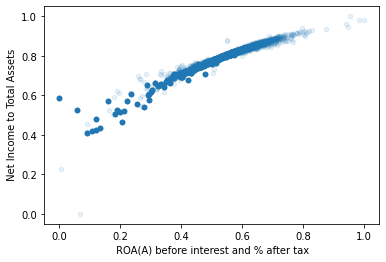

In [17]:
# любые линии на одном из графиков свидетельствуют о наличии корреляции в той или иной степени. также для нас могут быть полезны и некоторые другие формы распределения. 
# например здесь наблюдается почти линейная зависимость

dataproceesed.plot(kind="scatter", x=2, y=38, alpha=0.1)

In [18]:
# Давайте посмотрим на корреляцию лэйблов от фич. многие имеют сильную линейную зависимость
corr_matrix = dataproceesed.corr()
corr_matrix["Bankrupt?"].sort_values(ascending=False)

Bankrupt?                                                   1.000000
 Debt ratio %                                               0.576289
 Current Liability to Assets                                0.459132
 Fixed Assets Turnover Frequency                            0.178175
 Cash/Current Liability                                     0.122816
 Liability-Assets Flag                                      0.115637
 Quick Asset Turnover Rate                                  0.072436
 Total assets to GNP price                                  0.057905
 Net Worth Turnover Rate (times)                            0.054823
 Current Asset Turnover Rate                                0.033204
 Inventory/Current Liability                                0.002227
 Long-term Liability to Current Assets                      0.002156
 Inventory Turnover Rate (times)                           -0.004024
 Operating Expense Rate                                    -0.017179
 Cash Turnover Rate               

In [19]:
# нормализуем данные 
x = dataproceesed.values #returns a numpy array

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
dataproceesed = pd.DataFrame(x_scaled)

In [20]:
# # разделение на тестовую выборку и тренировочную в лоб

# def split_train_test(data, test_ratio):
#     shuffled_indices = np.random.permutation(len(data))
#     test_set_size = int(len(data) * test_ratio)
#     test_indices = shuffled_indices[:test_set_size]
#     train_indices = shuffled_indices[test_set_size:]
#     return data.iloc[train_indices], data.iloc[test_indices]
# train_set, test_set = split_train_test(dataproceesed, 0.2)
# print(len(train_set), "train +", len(test_set), "test")

In [21]:
# разделение на тестовую выборку и тренировочную методом хеширования
def test_set_check(identifier, test_ratio, hash):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio
def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
    return data.loc[~in_test_set], data.loc[in_test_set]


dataproceesed = shuffle(dataproceesed)
pd.notnull(dataproceesed)


data_with_id = dataproceesed.reset_index()   # добавляет колонку с индексом
train_set, test_set = split_train_test_by_id(data_with_id, 0.2, "index")

print(len(train_set), "train +", len(test_set), "test")

10518 train + 2681 test


In [22]:
# делим каждый на лэйблы и фичи
columns = list(dataproceesed)
columns.pop(0)

train_set_labeles = train_set[0]
train_set_features = train_set.loc[:, columns]



test_set_labeles = test_set[0]
test_set_features = test_set.loc[:, columns]

test_set_features.head(3)

,1,2,3,4,5,6,7,8,9,10,...,31,32,33,34,35,36,37,38,39,40
3,0.418515,0.433984,0.461427,4.121937e-14,1.165361e-14,5.667233e-13,0.00000,0.139354,0.139354,0.139354,...,3.115747e-14,3.019010e-14,2.870000e-01,0.938889,0.633801,0.534595,0.0,0.725750,4.962888e-14,0.015620
4,0.563399,0.612026,0.611061,3.059332e-14,1.670634e-14,0.000000e+00,0.10163,0.193924,0.193924,0.193924,...,2.009250e-14,1.819950e-14,3.217371e-14,0.994797,0.676971,0.670146,0.0,0.842276,5.984028e-14,0.124118
8,0.549310,0.550425,0.589218,1.936535e-14,8.146293e-01,1.414283e-13,0.08098,0.175425,0.175425,0.175425,...,2.049635e-14,2.207109e-14,4.612317e-14,0.470879,0.666001,0.660318,0.0,0.807061,5.231729e-14,0.043817


In [23]:
aaa = pd.notnull(train_set_features)#без этого не запускается моделью не знаю почему. вроде ничего не меняю же
# # np.isfinite

In [24]:
aaa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10518 entries, 0 to 13198
Data columns (total 40 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   1       10518 non-null  bool 
 1   2       10518 non-null  bool 
 2   3       10518 non-null  bool 
 3   4       10518 non-null  bool 
 4   5       10518 non-null  bool 
 5   6       10518 non-null  bool 
 6   7       10518 non-null  bool 
 7   8       10518 non-null  bool 
 8   9       10518 non-null  bool 
 9   10      10518 non-null  bool 
 10  11      10518 non-null  bool 
 11  12      10518 non-null  bool 
 12  13      10518 non-null  bool 
 13  14      10518 non-null  bool 
 14  15      10518 non-null  bool 
 15  16      10518 non-null  bool 
 16  17      10518 non-null  bool 
 17  18      10518 non-null  bool 
 18  19      10518 non-null  bool 
 19  20      10518 non-null  bool 
 20  21      10518 non-null  bool 
 21  22      10518 non-null  bool 
 22  23      10518 non-null  bool 
 23  24      105

In [25]:
# строим самую сложную модель! 

lin_reg = LinearRegression()
lin_reg.fit(train_set_features, train_set_labeles)

LinearRegression()

In [26]:
# проверка на тренировочной выборке

predictions = lin_reg.predict(train_set_features)
lin_mse = mean_squared_error(train_set_labeles, predictions)
lin_rmse = np.sqrt(lin_mse)



# проверка на тестовой выборке

predictions2 = lin_reg.predict(test_set_features)
lin_mse2 = mean_squared_error(test_set_labeles, predictions2)
lin_rmse2 = np.sqrt(lin_mse2)

print("ошибка на тренировочном датасете: ",lin_rmse*100,"%\n","ошибка на тестовом датасете: ",lin_rmse2*100,"%")

ошибка на тренировочном датасете:  34.02845269458686 %
 ошибка на тестовом датасете:  35.02688589311661 %


In [27]:
# значения не различаются сильно, значит перетренировки нет, однкао сам показатель ошибки в 34% свидетельствует о underfitting. Значит нам нужна модель посложнее
# благодаря построению линейной регрессии мы установили, что самая простая модель способна достичь 66% верных результатов. 

In [28]:
ada = AdaBoostClassifier(base_estimator=None,learning_rate=1.4, algorithm="SAMME.R", n_estimators=450)
ada.fit(train_set_features, train_set_labeles)

AdaBoostClassifier(learning_rate=1.4, n_estimators=450)

In [29]:
# проверка на тренировочной выборке

predictionsada = ada.predict(train_set_features)
lin_mseada = mean_squared_error(train_set_labeles, predictionsada)
lin_rmseada = np.sqrt(lin_mseada)


# проверка на тестовой выборке

predictions2ada = ada.predict(test_set_features)
lin_mse2ada = mean_squared_error(test_set_labeles, predictions2ada)
lin_rmse2ada = np.sqrt(lin_mse2ada)

print("ошибка на тренировочном датасете: ",lin_rmseada*100,"%\n","ошибка на тестовом датасете: ",lin_rmse2ada*100,"%")

ошибка на тренировочном датасете:  8.883261830498517 %
 ошибка на тестовом датасете:  14.322965233661286 %


In [30]:
#преобразуем из пандас в нампай. потому, что так надо для тензорфлоу
test_set_features=np.array(test_set_features,dtype=float)
train_set_features=np.array(train_set_features,dtype=float)
test_set_labeles=np.array(test_set_labeles,dtype=float)
train_set_labeles=np.array(train_set_labeles,dtype=float)

In [31]:
#makes [[1,2,3],[4,5,6]]  =>  [[[1],[2],[3]],[[4],[5],[6]]] потому, что рекурентная нейросеть
def make_1d(matr):
    list1 = []
    list2 = []
    list3 = []
    for instnce in matr:
        list2 = []        
        for element in instnce:
            list3 = []
            list3.append(float(element))
            list2.append(list3)
        list2.append(list3)
        list1.append(list2)
    return np.array(list1,dtype=float)    

In [32]:
test_set_features = make_1d(test_set_features)
train_set_features = make_1d(train_set_features)
test_set_labeles = np.array(test_set_labeles,dtype=float)   
train_set_labeles = np.array(train_set_labeles,dtype=float)   

In [33]:
train_set_features.shape

(10518, 41, 1)

In [34]:
train_set_labeles.shape

(10518,)

In [35]:
# tensorflow Version: 2.4.0
# однослойная

model= tf.keras.Sequential()
model.add(keras.layers.LSTM(1,batch_input_shape=(None,41,1)))
model.compile(loss='mean_absolute_error', optimizer = "adam",metrics=['accuracy'])
history = model.fit(train_set_features,train_set_labeles,  epochs = 12)

# итак. тут у нас всего 1 слой
# model.add(keras.layers.LSTM(1,batch_input_shape=(None,41,1)))
# LSTM - тип этого слоя. 1 - количество выходов из этого слоя
# batch_input_shape=(None,41,1) - параметры данных на вход в слой 
# None если я не знаю количество импутов. а я в итоге не знаю
# 41 - количество фич
# 1 это количество точек в векторе. у нас одна точка, потому что мы преобразовывали чуть выше просто числа в вектора 1

Epoch 1/12
329/329 [==============================] - 3s 7ms/step - loss: 0.4979 - accuracy: 0.5022
Epoch 2/12
329/329 [==============================] - 2s 7ms/step - loss: 0.4971 - accuracy: 0.5022
Epoch 3/12
329/329 [==============================] - 2s 7ms/step - loss: 0.4455 - accuracy: 0.6004
Epoch 4/12
329/329 [==============================] - 2s 7ms/step - loss: 0.3879 - accuracy: 0.6959
Epoch 5/12
329/329 [==============================] - 2s 7ms/step - loss: 0.3658 - accuracy: 0.6956
Epoch 6/12
329/329 [==============================] - 2s 7ms/step - loss: 0.3518 - accuracy: 0.6986
Epoch 7/12
329/329 [==============================] - 3s 8ms/step - loss: 0.3443 - accuracy: 0.6977
Epoch 8/12
329/329 [==============================] - 2s 7ms/step - loss: 0.3392 - accuracy: 0.6980
Epoch 9/12
329/329 [==============================] - 2s 8ms/step - loss: 0.3359 - accuracy: 0.6964
Epoch 10/12
329/329 [==============================] - 2s 7ms/step - loss: 0.3322 - accuracy: 0.6961

In [36]:
model= tf.keras.Sequential()


model.add(keras.layers.Dense(41,batch_input_shape=(None,41,1), activation=tf.keras.activations.sigmoid))
model.add(keras.layers.Dense(82,batch_input_shape=(None,41,1), activation=tf.keras.activations.sigmoid))
model.add(keras.layers.Dense(164,batch_input_shape=(None,82,1), activation=tf.keras.activations.sigmoid))
model.add(keras.layers.LSTM(20,batch_input_shape=(None,164,1), activation=tf.keras.activations.sigmoid))
model.add(keras.layers.Dense(10,batch_input_shape=(None,20,1), activation='linear'))
model.add(keras.layers.Dense(1,batch_input_shape=(None,10,1), activation='linear'))


model.compile(loss='mean_absolute_error', optimizer = "adam",metrics=['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 41, 41)            82        
_________________________________________________________________
dense_1 (Dense)              (None, 41, 82)            3444      
_________________________________________________________________
dense_2 (Dense)              (None, 41, 164)           13612     
_________________________________________________________________
lstm_1 (LSTM)                (None, 20)                14800     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 32,159
Trainable params: 32,159
Non-trainable params: 0
__________________________________________________

In [37]:
history = model.fit(train_set_features,train_set_labeles,  epochs = 18, validation_data=(test_set_features,test_set_labeles))

Epoch 1/18
329/329 [==============================] - 4s 10ms/step - loss: 0.4995 - accuracy: 0.5024 - val_loss: 0.4935 - val_accuracy: 0.5088
Epoch 2/18
329/329 [==============================] - 3s 9ms/step - loss: 0.5007 - accuracy: 0.4982 - val_loss: 0.4981 - val_accuracy: 0.5088
Epoch 3/18
329/329 [==============================] - 3s 9ms/step - loss: 0.4987 - accuracy: 0.5039 - val_loss: 0.5080 - val_accuracy: 0.4912
Epoch 4/18
329/329 [==============================] - 3s 9ms/step - loss: 0.4981 - accuracy: 0.5005 - val_loss: 0.4996 - val_accuracy: 0.5088
Epoch 5/18
329/329 [==============================] - 3s 9ms/step - loss: 0.5018 - accuracy: 0.4963 - val_loss: 0.5039 - val_accuracy: 0.4912
Epoch 6/18
329/329 [==============================] - 3s 9ms/step - loss: 0.4998 - accuracy: 0.5022 - val_loss: 0.5047 - val_accuracy: 0.4912
Epoch 7/18
329/329 [==============================] - 3s 9ms/step - loss: 0.5003 - accuracy: 0.5022 - val_loss: 0.5060 - val_accuracy: 0.4912
Epoch

In [38]:
model= tf.keras.Sequential()

model.add(keras.layers.Dense(410,batch_input_shape=(None,41,1), activation=tf.keras.activations.linear))
model.add(keras.layers.SimpleRNN(410,batch_input_shape=(None,410,1), activation=tf.keras.activations.sigmoid, return_sequences=True))
model.add(keras.layers.SimpleRNN(410,batch_input_shape=(None,410,1), activation=tf.keras.activations.sigmoid, return_sequences=False))
model.add(keras.layers.Dense(205,batch_input_shape=(None,410,1), activation=tf.keras.activations.sigmoid))
model.add(keras.layers.Dense(100,batch_input_shape=(None,205,1), activation=tf.keras.activations.sigmoid))

model.add(keras.layers.Dense(50,batch_input_shape=(None,100,1), activation=tf.keras.activations.linear))
model.add(keras.layers.Dense(20,batch_input_shape=(None,50,1), activation=tf.keras.activations.linear))
model.add(keras.layers.Dense(20,batch_input_shape=(None,20,1), activation=tf.keras.activations.linear))
model.add(keras.layers.Dense(10,batch_input_shape=(None,20,1), activation=tf.keras.activations.linear))
model.add(keras.layers.Dense(1,batch_input_shape=(None,10,1), activation=tf.keras.activations.linear))
model.add(keras.layers.Dense(1,batch_input_shape=(None,1,1), activation=tf.keras.activations.linear))

model.compile(loss='mean_squared_error', optimizer = "adam",metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 41, 410)           820       
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 41, 410)           336610    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 410)               336610    
_________________________________________________________________
dense_6 (Dense)              (None, 205)               84255     
_________________________________________________________________
dense_7 (Dense)              (None, 100)               20600     
_________________________________________________________________
dense_8 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_9 (Dense)              (None, 20)               

In [39]:
history = model.fit(train_set_features,train_set_labeles,  epochs = 11, validation_data=(test_set_features,test_set_labeles))

Epoch 1/11
329/329 [==============================] - 18s 52ms/step - loss: 0.2946 - accuracy: 0.5105 - val_loss: 0.2327 - val_accuracy: 0.4912
Epoch 2/11
329/329 [==============================] - 17s 52ms/step - loss: 0.1698 - accuracy: 0.7578 - val_loss: 0.1628 - val_accuracy: 0.7762
Epoch 3/11
329/329 [==============================] - 17s 52ms/step - loss: 0.1551 - accuracy: 0.7831 - val_loss: 0.1903 - val_accuracy: 0.7464
Epoch 4/11
329/329 [==============================] - 17s 52ms/step - loss: 0.1464 - accuracy: 0.7953 - val_loss: 0.1244 - val_accuracy: 0.8198
Epoch 5/11
329/329 [==============================] - 17s 53ms/step - loss: 0.1238 - accuracy: 0.8330 - val_loss: 0.1194 - val_accuracy: 0.8251
Epoch 6/11
329/329 [==============================] - 17s 53ms/step - loss: 0.1222 - accuracy: 0.8326 - val_loss: 0.1192 - val_accuracy: 0.8515
Epoch 7/11
329/329 [==============================] - 17s 53ms/step - loss: 0.1120 - accuracy: 0.8482 - val_loss: 0.1086 - val_accuracy:

In [40]:
results = model.predict(test_set_features)

In [41]:
print(len(results))
print(len(test_set_features))
print(len(test_set_labeles))

2681
2681
2681


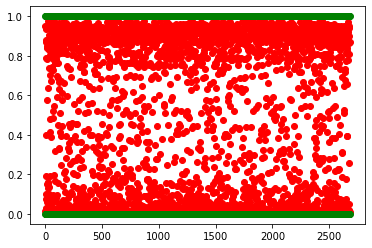

In [42]:
plt.scatter(range(len(results)),results,c="r")
plt.scatter(range(len(test_set_labeles)),test_set_labeles,c="g")
plt.show()

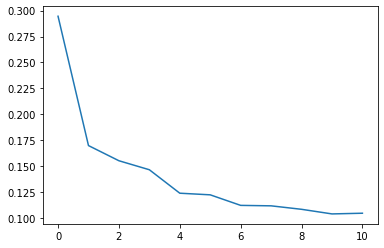

In [43]:
plt.plot(history.history["loss"])
plt.show()